### Debugging outputs

1.   
(b) It is a stochastic method so your answer may vary. It takes ~1700 steps to converge and took ~0.1 sec

2. 
(b) takes ~250 steps to converge and took ~0.02 sec



$𝑓(𝑥,𝑦)=(1−𝑥)^2 +10(𝑦−𝑥^2)^2$ with only one (global) minimum at (𝑥, 𝑦) = (1.0,1.0)!

### Helper functions

A timing decorator. Put at the beginning of your function so that every time your function is called it'll print out the execution time

In [14]:
# normalize the noise and then multiply it by norm of gradient
import numpy as np
import scipy as sc
from random import *

In [6]:
initial_pt = np.array([-0.5,1.5])
display(initial_pt[0], initial_pt[1])

-0.5

1.5

In [12]:
def rosen_bro(pt):
    return (1 - pt[0])**2 + 10*(pt[1] - pt[0]**2)**2
def df_dx(pt):
    return (-2 + (2*pt[0]) - (40 * pt[1] * pt[0]) + (40 * pt[0]**3))
def df_dy(pt):
    return ((20 * pt[1]) - (20 * pt[0]**2))
display('df_dx: ' + str(df_dx(initial_pt)))
display('df_dy: ' + str(df_dy(initial_pt)))

'df_dx: 22.0'

'df_dy: 25.0'

In [13]:
def df_dxy(pt):
    return np.array([(-2 + (2*pt[0]) - (40 * pt[1] * pt[0]) + (40 * pt[0]**3)),
                    (20 * pt[1]) - (20 * pt[0]**2)])
df_dxy(initial_pt)

array([22., 25.])

In [8]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

A function that help to visualize the optimization pathway:

In [9]:
%matplotlib notebook
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

### Templates for algorithm you need to implement

In [10]:
from pylab import *
import numpy.linalg as LA

In [21]:
random() # returns a value between 0 and 1
(random() * 2) - 1

-0.827614575521088

In [31]:
LA.norm(initial_pt)

1.5811388300841898

In [33]:
def rand_2(grad_stp):
    rand_vec = np.array([((random() * 2) - 1), ((random() * 2) - 1)])
    nrml_rand = rand_vec / LA.norm(rand_vec)
    fin_rand = nrml_rand * LA.norm(grad_stp)
    return fin_rand
rand_2(initial_pt)

array([1.58083366, 0.03106371])

In [43]:
@timeit
def stochastic_gradient_descent(func, first_derivate, starting_point,
                                stepsize, tol=1e-5,
                                stochastic_injection=1):
    '''
    first_derivate: a function that calculates gradient
    stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
    0 for no stochasticity, equivalent to SD. 
    Use 1 in this homework to run SGD
    '''
    # evaluate the gradient at starting point
    deriv = first_derivate(starting_point)
    count=0
    visited=[]
    while LA.norm(deriv) > tol and count < 1e5: #  ogLA.norm(deriv)
        deriv = first_derivate(starting_point)
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            stochastic_deriv = rand_2(deriv)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        new_point = starting_point + (stepsize * direction)
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = 1.2 * stepsize
            starting_point = new_point
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = 0.5 * stepsize
        count+=1
        visited.append(starting_point)
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited),
            "count" : count}

In [45]:
res = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1)
display(res)

func:'stochastic_gradient_descent' took: 0.0852 sec


{'x': array([0.99998917, 0.999978  ]),
 'evaluation': 1.184541349723636e-10,
 'path': array([[-0.5       ,  1.5       ],
        [-0.5       ,  1.5       ],
        [-0.31697351,  0.4802885 ],
        ...,
        [ 0.99998927,  0.99997778],
        [ 0.99998911,  0.99997777],
        [ 0.99998917,  0.999978  ]]),
 'count': 2227}

<IPython.core.display.Javascript object>


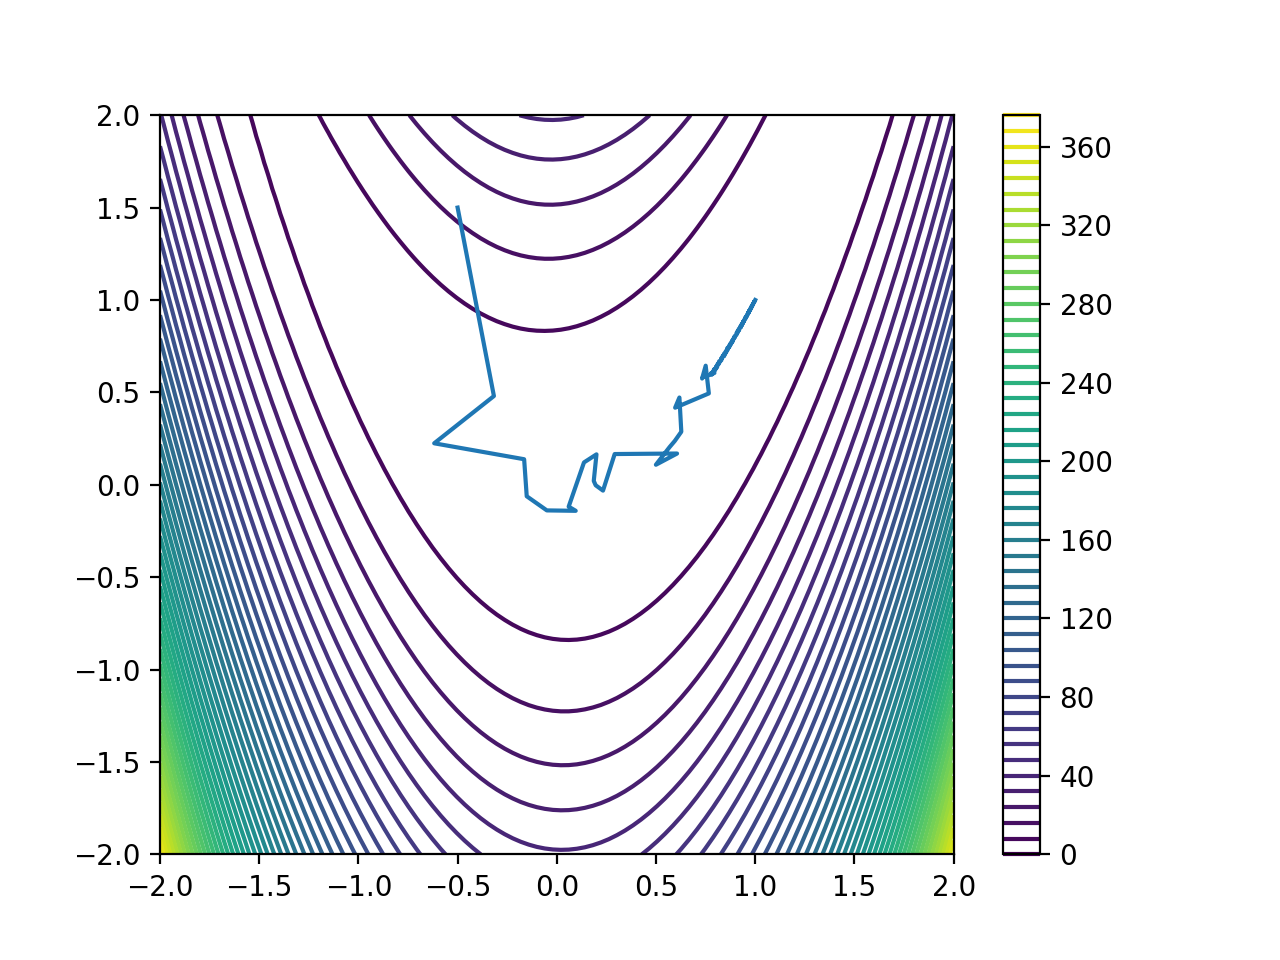

In [46]:
draw_path(rosen_bro,res['path'])

In [4]:
def SGDM(func,first_derivate,starting_point,stepsize,momentum=0.9,tol=1e-5,stochastic_injection=1):
    # evaluate the gradient at starting point
    
    count=0
    visited=[]
    while LA.norm(deriv) > tol and count < 1e5:
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            ...
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        ...
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            ...
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            # if stepsize is too small, clear previous direction because we already know that is not a useful direction
            if stepsize<1e-5:
                previous_direction=previous_direction-previous_direction
            else:
                # do the same as SGD here
                ...
        count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}